In [1]:
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
import pandas as pd
import numpy as np

<font size=6><b> lec10. Object 변수

### 범주형 변수 categorical data 처리 
- 범주형 변수 : 순서가 있는 글자 변수
* 글자를 숫자로 바꾸기
    * 라벨인코딩(Label Encoding)
    * 원핫인코딩(One-hot Encoding)
    * df[컬럼].astype('category')
    <br><br>
* 범주화(Bining) 
    * 연속된 수치를 구간화(범주화)

> <font size=4><b>(1) 라벨인코딩(Label Encoding)
> * n개의 범주형 데이터를 0부터 n-1까지의 연속적 수치 데이터로 표현
> * 글자 --> 일련의 숫자 ( 사전순으로 숫자 부여 )

In [ ]:
# sklearn --> scikit-learn : 머신러닝 패키지(설치시 이름만 변경)
# 설치 위해 pip 버전 2.30 이상 필요
######### ! pip install scikit-learn

In [3]:
from sklearn.preprocessing import LabelEncoder

- def fit(self,a,b)
- self가 있는 함수는 클래스 이름으로 생성자를 호출해야만 사용가능하다는 뜻
- 단독으로 fit() 형식으로 사용 불가능
- a=LabelEncoder()
- a.fit()

In [4]:
df = pd.DataFrame({"name":["smith",'martin',"jones","allen","king"],"score": ["A","B",np.nan,"A","C"]})
df.head()

,name,score
0,smith,A
1,martin,B
2,jones,NaN
3,allen,A
4,king,C


In [5]:
le = LabelEncoder() # 클래스 이름() == 생성자 함수 : 초기화
le.fit(df['name']) #모든 값을 사전순으로 메모리에 올려놓고 distinct , 변수 사용 금지
res=le.transform(df['name']) # 변환

print(df['name'].values)
print(res)

['smith' 'martin' 'jones' 'allen' 'king']
[4 3 1 0 2]


In [6]:
le = LabelEncoder() # 클래스 이름() == 생성자 함수 : 초기화
le.fit(df['score']) #모든 값을 사전순으로 메모리에 올려놓고 distinct , 변수 사용 금지
res=le.transform(df['score']) # 변환

print(df['score'].values)
print(res)

# 사전에 없는 nan 값은 마지막 번호
# 임의로 순서 변경 불가능

['A' 'B' nan 'A' 'C']
[0 1 3 0 2]


In [9]:
df['le_name']=res
df

,name,score,le_name
0,smith,A,0
1,martin,B,1
2,jones,NaN,3
3,allen,A,0
4,king,C,2


> <font size=4><b>(2) 원핫인코딩(One-hot Encoding)
> * 집합의 크기를 벡터의 차원으로 하고, 표현하고 싶은 단어의 인덱스에 1의 값을 부여하고, 다른 인덱스에는 0을 부여하는 벡터(한줄) 표현 방식
> *  데이터프레임에서 object 타입으로 되어있는 변수는 dummy 변수화
> * <font color=red><b> 판다스의 시리즈가 아닌 numpy 행렬을 입력해야함 → df['컬럼'].values
> * <font color=red><b> 벡터 입력을 허용하지 않음(2차원, list 불가능) → reshape(-1,1)을 이용해 Matrix로 변환  (N,) → (N,1)

In [12]:
df['score'].shape # array의 요소값 5개 --> 1차원

(5,)

In [14]:
df['score'].shape , df.shape

((5,), (5, 3))

In [17]:
df['score'].values # 1차 : 벡터(vector)

array(['A', 'B', nan, 'A', 'C'], dtype=object)

In [16]:
df['score'].values.reshape(-1,1) #  줄은 상관 없음, 칸은 1칸
# 2차로 변경 : 매트릭스(Matrix) --> 무조건 2차로 만들어 사용해야 함

array([['A'],
       ['B'],
       [nan],
       ['A'],
       ['C']], dtype=object)

In [10]:
from sklearn.preprocessing import OneHotEncoder

In [19]:
oe = OneHotEncoder()
oe.fit(    df['score'].values.reshape(-1,1)   )  # 반드시 2차**** 넣기
res = oe.transform(  df['score'].values.reshape(-1,1)  )
print(res)

#sparse matrix (희소 행렬) : 데이터 값이 대부분 0 인 행렬
#(줄,칸)에 1이 들어있다

  (0, 0)	1.0
  (1, 1)	1.0
  (2, 3)	1.0
  (3, 0)	1.0
  (4, 2)	1.0


In [20]:
oe = OneHotEncoder(sparse=False)
oe.fit(    df['score'].values.reshape(-1,1)   )  # 반드시 2차**** 넣기
res = oe.transform(  df['score'].values.reshape(-1,1)  )
print(res) # 결측이 있어 float으로 표현

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]]


In [21]:
df['score'] 
#각 값의 위치(사전순)
#   A  B  C  nan
#  [1. 0. 0. 0.]
#  [0. 1. 0. 0.]
#  [0. 0. 0. 1.]
#  [1. 0. 0. 0.]
#  [0. 0. 1. 0.]

0      A
1      B
2    NaN
3      A
4      C
Name: score, dtype: object

In [24]:
print(oe.categories_) # Onehot카테고리 값, list 안에 array

[array(['A', 'B', 'C', nan], dtype=object)]


In [26]:
print(oe.categories_[0])

['A' 'B' 'C' nan]


In [27]:
ohdf = pd.DataFrame(res, columns=oe.categories_[0])
ohdf

,A,B,C,NaN
0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0


In [28]:
totdf=pd.concat([df,ohdf],axis=1)
totdf

,name,score,le_name,A,B,C,NaN
0,smith,A,0,1.0,0.0,0.0,0.0
1,martin,B,1,0.0,1.0,0.0,0.0
2,jones,NaN,3,0.0,0.0,0.0,1.0
3,allen,A,0,1.0,0.0,0.0,0.0
4,king,C,2,0.0,0.0,1.0,0.0


> <font size=4><b>(3) get_dummies() = 결측 처리 + 라벨인코딩(Label Encoding) + 원핫인코딩(One-hot Encoding) 

In [33]:
df = pd.DataFrame({"name":["smith",'martin',"jones","allen","king"],"score": ["A","B",np.nan,"A","C"]})
df.head()

,name,score
0,smith,A
1,martin,B
2,jones,NaN
3,allen,A
4,king,C


In [34]:
ddf=pd.get_dummies(df)
ddf
#df의 유니크한 도메인(값) 수 만큼 컬럼이 생성됨(각 값이 컬럼이 됨)
#자동으로 결측 0 처리(수치 : 0, 글자 : 공백) --> 원하는 결측 처리 하고 get_dummies를 적용시키는 것이 좋다

,name_allen,name_jones,name_king,name_martin,name_smith,score_A,score_B,score_C
0,0,0,0,0,1,1,0,0
1,0,0,0,1,0,0,1,0
2,0,1,0,0,0,0,0,0
3,1,0,0,0,0,1,0,0
4,0,0,1,0,0,0,0,1


> <font size=4><b>(4) category타입
> - object --> 숫자    
> * df['컬럼'].astype('category').cat.codes
> * df['컬럼'].astype('category').cat.categories

In [58]:
df = pd.DataFrame({"name":["smith",'martin',"jones","allen","king"],"score": ["A","B",np.nan,"A","C"]})
df.head()

,name,score
0,smith,A
1,martin,B
2,jones,NaN
3,allen,A
4,king,C


In [59]:
df['name']=df['name'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   name    5 non-null      category
 1   score   4 non-null      object  
dtypes: category(1), object(1)
memory usage: 385.0+ bytes


In [62]:
type(df['name'].cat.codes)
df['name_cat_codes']=df['name'].cat.codes #카데고리성 코드 보기

In [63]:
df

,name,score,name_cat_codes
0,smith,A,4
1,martin,B,3
2,jones,NaN,1
3,allen,A,0
4,king,C,2


In [66]:
# 원본의 카테고리 보기
df['name_cat_categories']=df['name'].cat.categories

In [70]:
df.info()
# name을 카테고리화하면 name 삭제 --> 머신러닝은 object 학습하지 못함
# meta data : 데이터를 설명하는 데이터

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   name                 5 non-null      category
 1   score                4 non-null      object  
 2   name_cat_codes       5 non-null      int8    
 3   name_cat_categories  5 non-null      object  
dtypes: category(1), int8(1), object(2)
memory usage: 430.0+ bytes


- 참고용

In [65]:
d=dict(enumerate(df['name'].cat.categories))
d

{0: 'allen', 1: 'jones', 2: 'king', 3: 'martin', 4: 'smith'}

In [67]:
df

,name,score,name_cat_codes,name_cat_categories
0,smith,A,4,allen
1,martin,B,3,jones
2,jones,NaN,1,king
3,allen,A,0,martin
4,king,C,2,smith


In [68]:
df['name_cat_categories']=df['name_cat_codes'].map(d)
df

,name,score,name_cat_codes,name_cat_categories
0,smith,A,4,smith
1,martin,B,3,martin
2,jones,NaN,1,jones
3,allen,A,0,allen
4,king,C,2,king


- 참고용

In [69]:
code,cate=pd.factorize( df['name'] )
print(code)
print(cate)
print(cate[code])

[0 1 2 3 4]
CategoricalIndex(['smith', 'martin', 'jones', 'allen', 'king'], categories=['allen', 'jones', 'king', 'martin', 'smith'], ordered=False, dtype='category')
CategoricalIndex(['smith', 'martin', 'jones', 'allen', 'king'], categories=['allen', 'jones', 'king', 'martin', 'smith'], ordered=False, dtype='category')


> <font size=4><b>(5) 범주화(Bining)
> * 연속형 데이터를 구간으로 나누어 범주화하는 방법
> * pd.cut()  : 동일 구간으로 나누기
> * pd.qcut() : 동일 갯수로 나누기(구간과 무관)
> - cf) Binding

- 정규분포도를 따르는 랜덤성 데이터 생성
<pre>
np.random.normal(loc=0.0, scale=1.0, <b>size=None</b>)

In [38]:
np.random.seed(9898989) # seed 값 고정시키기 --> 더이상 random 값 x
ndata= np.random.normal(size=100) # 정규분포도 만들기 : 최소 데이터가 30개 이상이어야 정규분포도가 만들어짐(큰 수의 법칙)
ndata

array([-1.31110712e+00,  2.47894037e-01,  2.68903932e-01, -5.56471050e-01,
        1.38038066e+00, -5.41018141e-01,  2.10523672e-01, -1.47734354e-01,
       -8.69983302e-01, -2.66550855e-02,  7.04557287e-02,  1.11844875e+00,
        5.68707124e-01,  1.88946415e-01,  4.20231919e-01, -1.85400465e+00,
        9.77583762e-01,  1.08756336e-01, -5.47319792e-02,  5.39631107e-01,
        1.11745037e+00,  4.72359414e-01, -3.04185664e-01,  1.15008748e+00,
       -1.39785456e+00,  7.96533497e-01, -8.27342413e-01, -1.63121427e+00,
       -2.55549574e+00,  3.76377387e-01,  2.87133822e-01,  5.25248360e-01,
       -6.93898229e-02, -2.28682921e-01,  2.12583592e+00,  5.12977139e-01,
        3.24385828e-01,  4.20652650e-01,  1.97062441e-01,  1.43075902e-01,
        3.20248623e-01, -1.69557234e-01,  6.11054836e-02, -1.35145898e+00,
       -7.81384265e-01, -1.67612818e+00, -2.10817772e+00,  9.36420364e-01,
        6.98055638e-01,  2.24340440e-01,  7.12623215e-01,  6.26997769e-02,
       -4.97023165e-01, -

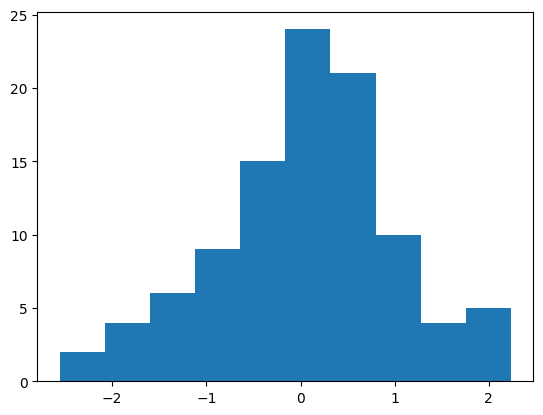

In [42]:
import matplotlib.pyplot as plt
plt.hist(ndata) # hist() : 누적 분포도
plt.show()

## 1. cut()

In [46]:
cutdata=pd.cut(ndata,5) # 데이터 5등분
cutdata

[(-1.598, -0.64], (-0.64, 0.318], (-0.64, 0.318], (-0.64, 0.318], (1.276, 2.233], ..., (0.318, 1.276], (-0.64, 0.318], (0.318, 1.276], (0.318, 1.276], (-0.64, 0.318]]
Length: 100
Categories (5, interval[float64, right]): [(-2.56, -1.598] < (-1.598, -0.64] < (-0.64, 0.318] < (0.318, 1.276] < (1.276, 2.233]]

In [51]:
cutdata=pd.cut([1,2,3,4,5,6,7,8,9,10],5) # 데이터 동일한 간격으로 5등분
print(cutdata.describe())
print(cutdata.value_counts())

              counts  freqs
categories                 
(0.991, 2.8]       2    0.2
(2.8, 4.6]         2    0.2
(4.6, 6.4]         2    0.2
(6.4, 8.2]         2    0.2
(8.2, 10.0]        2    0.2
(0.991, 2.8]    2
(2.8, 4.6]      2
(4.6, 6.4]      2
(6.4, 8.2]      2
(8.2, 10.0]     2
dtype: int64


In [55]:
my_range = [0,3,7,10] # 0~3  4~7  9~10
res=pd.cut([1,2,3,4,5,6,7,8,9,10],my_range)
res.describe()

,counts,freqs
categories,,
"(0, 3]",3,0.3
"(3, 7]",4,0.4
"(7, 10]",3,0.3


In [54]:
my_range = [0,3,7,10] # 0~3  4~7  9~10
my_label =['대','중','소']
res=pd.cut([1,2,3,4,5,6,7,8,9,10],my_range, labels=my_label)
res.describe()

,counts,freqs
categories,,
대,3,0.3
중,4,0.4
소,3,0.3


## 2. qcut()

In [56]:
np.random.seed(9898989) # seed 값 고정시키기 --> 더이상 random 값 x
ndata= np.random.normal(size=100) # 정규분포도 만들기 : 최소 데이터가 30개 이상이어야 정규분포도가 만들어짐(큰 수의 법칙)
ndata

array([-1.31110712e+00,  2.47894037e-01,  2.68903932e-01, -5.56471050e-01,
        1.38038066e+00, -5.41018141e-01,  2.10523672e-01, -1.47734354e-01,
       -8.69983302e-01, -2.66550855e-02,  7.04557287e-02,  1.11844875e+00,
        5.68707124e-01,  1.88946415e-01,  4.20231919e-01, -1.85400465e+00,
        9.77583762e-01,  1.08756336e-01, -5.47319792e-02,  5.39631107e-01,
        1.11745037e+00,  4.72359414e-01, -3.04185664e-01,  1.15008748e+00,
       -1.39785456e+00,  7.96533497e-01, -8.27342413e-01, -1.63121427e+00,
       -2.55549574e+00,  3.76377387e-01,  2.87133822e-01,  5.25248360e-01,
       -6.93898229e-02, -2.28682921e-01,  2.12583592e+00,  5.12977139e-01,
        3.24385828e-01,  4.20652650e-01,  1.97062441e-01,  1.43075902e-01,
        3.20248623e-01, -1.69557234e-01,  6.11054836e-02, -1.35145898e+00,
       -7.81384265e-01, -1.67612818e+00, -2.10817772e+00,  9.36420364e-01,
        6.98055638e-01,  2.24340440e-01,  7.12623215e-01,  6.26997769e-02,
       -4.97023165e-01, -

In [57]:
qdata=pd.qcut(ndata,5) #데이터 개수 일정, 구간 범위는 다름
qdata.describe()

,counts,freqs
categories,,
"(-2.556, -0.707]",20,0.2
"(-0.707, -0.0379]",20,0.2
"(-0.0379, 0.306]",20,0.2
"(0.306, 0.792]",20,0.2
"(0.792, 2.233]",20,0.2
